In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
import plotnine as gg 
from plotnine import ggplot

In [19]:
# Summary statistics

# What would be valuable information for me to get? -> Reaction time information
# There is not much else in the ppts_merged file -> did not record age etc

ppts_merged = pd.read_csv('ppts_merged.csv')

summary_id = ppts_merged.groupby(by='id').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std)
)
summary_id.reset_index(inplace=True)
#print(summary_id)

summary_freq = ppts_merged.groupby(by='freq').aggregate(
    mean_RT=pd.NamedAgg('reaction_time', np.mean),
    std_RT=pd.NamedAgg('reaction_time', np.std)
)
summary_freq.reset_index(inplace=True)
#print(summary_freq)

**Let's make some plots with these RTs**

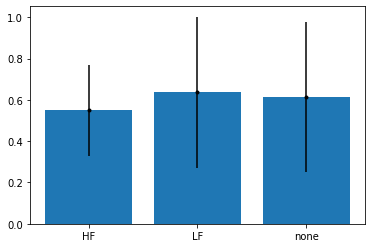

In [20]:
# With aggregated data (mean and sd reaction time)

plt.figure()
plt.bar(summary_freq['freq'], summary_freq['mean_RT'])
plt.errorbar(summary_freq['freq'], summary_freq['mean_RT'], summary_freq['std_RT'], fmt='k.')
plt.show()

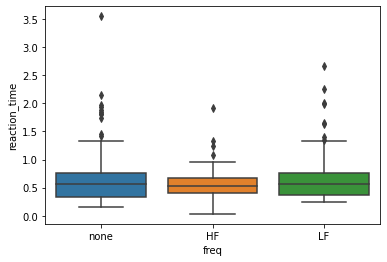

In [21]:
# With raw data

sns.boxplot(x='freq', y='reaction_time', data=ppts_merged)
plt.show()

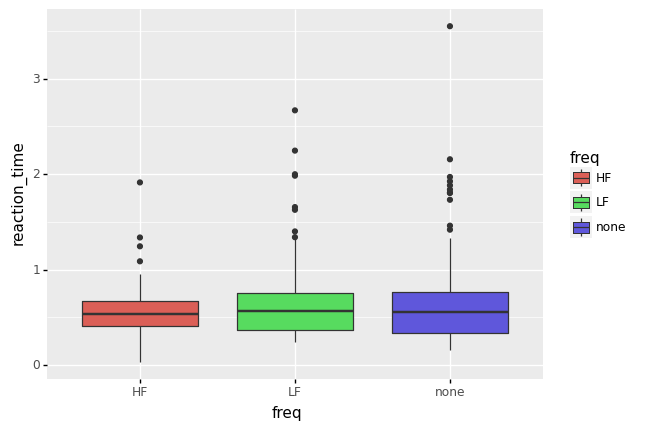

In [22]:
# With raw data

plot = (
    ggplot(gg.aes(x='freq', y='reaction_time'), data=ppts_merged) +
    gg.geom_boxplot(gg.aes(fill='freq'))
)
plot.draw()
plt.show()


**Hypothesis: participants will respond faster to high-frequency words than to low-frequency words.**

Although there are only four participants in my dataset, and all four of those were me doing my own experiment rather quickly, there is an effect of frequency in this data (numerical, probably not statistical). The boxplots do not show that very well, but the bar plot does. 